# Part I - Using R To Analyze Data

Download the following file (https://www.dropbox.com/s/zjf0lm830wzmkwz/snmp-delta.csv?dl=0), which contains the following as table as comma-separated values.

here are a total of 8 columns of data. You should be able to read the data into R using the provided commands below.

These are measurements in packets per interval and bytes per interval for specific interfaces on the router from the prior assignment, ideally structured as a notebook. For this assignment, you're going to hand in an "R Program" that shows how you analyzed the data. 

You should hand in a single PDF document with your answers to the questions, including any graphics needed. R can produce plots of graphs (described below) -- if you don't or can't use the notebook form (which will include the plots directly), you should be able to suck the plots into OpenOffice or other word processing tools.

In [1]:
snmpData = read.csv('snmp-delta.csv')
snmpData

,sample,if.,outUCastPkts,inOctets,outOctets,inUcastPkts,outNUCastPkts,inNUcastPkts
1,0,1,0,0,0,0,0,0
2,0,2,672,184683,90820,2226,0,0
3,0,3,96,116273,14370,866,0,0
4,0,6,119,97039,16290,751,0,0
5,0,7,678,149297,92040,2201,0,0
6,0,9,0,0,0,0,0,0
7,0,10,1621,0,142038,0,0,0
8,0,11,1621,0,142038,0,0,0
9,1,1,0,0,0,0,0,0
10,1,2,376,143765,52072,1619,0,0


### Problem #1
**Data Manipulation**: Show how to compute a table that contain the sum of all packets (input and outputt, unicast and non-unicast) for each interface and the sum of bytes (input and outputt, unicast and non-unicast) for each interface for each output link. The table should have a total of 3 columns (interface, packets, bytes) and a row for each interface. 

Refer to "slices" on page 5 and 6 of the SimpleR manual and the **data.frame** function to construct a data frame from vectors. In my solution, I defined functions that sliced the data for a specific interface and then used **sapply** to compute the data for all interfaces.

In [2]:
getPackets <- function(iff){
    (inter <- snmpData[snmpData$if. == iff, ])
    invisible(inter$packets <- data.frame(inter$outUCastPkts,inter$inUcastPkts,inter$outNUCastPkts,inter$inNUcastPkts))
    invisible(packets_rows <- data.frame(inter$if., rowSums(inter$packets)))
    (packets_total <- sum(packets_rows[,-1]))
    return (packets_total)
}

getBytes <- function(iff){
    invisible(inter <- snmpData[snmpData$if. == iff, ])
    invisible(inter$bytes <- data.frame(inter$inOctets,inter$outOctets))
    invisible(bytes_rows <- data.frame(inter$if., rowSums(inter$bytes)))
    (bytes_total <- sum(bytes_rows[,-1]))
    return (bytes_total)
}

ifs <- c(1,2,3,6,7,9,10,11)
packets <- sapply(ifs, getPackets)
bytes <- sapply(ifs, getBytes)

data.frame(interface=ifs, packets=packets, bytes=bytes)


,interface,packets,bytes
1,1,0,0
2,2,39054,3946320
3,3,17027,2493713
4,6,15260,2186780
5,7,37306,3340889
6,9,0,0
7,10,19793,1833765
8,11,19793,1833765


### Problem #2
**Summary Statistics**: Using the data for the inUcastPkts packets on interface #2, show how you would use R to compute the mean, variance, standard deviation and COV "by hand". For example, if you had read the data into data frame x, you could compute the sum of the first column using a **sum** over the slice of the inUcastPkts for interface 2, and then use this to compute the mean. You should  compute these terms using e.g. sum(), length() and other functions following the computations in the textbook. Your solution should show both the formulas and their output.

It will be easiest to first extract the data you are working on to a vector that you use in the remainder of your calculations.

In [3]:
inter <- snmpData[snmpData$if. == 2, ]
ucast <- inter$inUcastPkts

#mean = sum/length
m = sum(ucast)/length(ucast)
sprintf('Mean = %f', m)

#variance = sum((X_i-mean)^2)/(length-1)
var = sum((ucast-m)^2)/(length(ucast)-1)
sprintf("Variance = %f", var)

#std = sqrt(variance)
std = (var)^(1/2)
sprintf("Standard Deviation = %f", std)

#cov = std/mean
cov = std/m
sprintf("COV = %f", cov)


[1] "Mean = 1551.578947"

[1] "Variance = 151828.923977"

[1] "Standard Deviation = 389.652312"

[1] "COV = 0.251133"

### Problem #3
**R Bulit-in**: Use the built-in R commands (see the SimpleR manual) to compute the mean, variance, sd & COV for the other columns (I don't think there is a function for COV in R, so you will need to compute that by hand, or better yet, define an R function).


In [4]:
COV <- function(vect){
    ccv = sd(vect)/mean(vect)
    return(ccv)
}
#mean(ucast)
#var(ucast)
#sd(ucast)
#COV(ucast)

stats <- function(vect){
    mm <- mean(vect)
    vv <- var(vect)
    ss <- sd(vect)
    cc <- COV(vect)
    return(list(mm,vv,ss,cc))
}

#stats(ucast)

all_cols = function(col_name){
    asdf <- eval(parse(text = paste('inter$',col_name, sep="")))
    return(stats(asdf))
}

#inter$outUCastPkts,inter$inUcastPkts,inter$outNUCastPkts,inter$inNUcastPkts, inter$inOctets,inter$outOctets
cols = c('outUCastPkts','inUcastPkts','outNUCastPkts','inNUcastPkts', 'inOctets', 'outOctets')

#(eval(parse(text = 'inter$outUCastPkts')))

inter_2 <- snmpData[snmpData$if. == 2, ]

sdf = sapply(cols, all_cols)
rownames(sdf) <-c('Mean', 'Variance', 'Stdv.', 'COV')

(sdf)




,outUCastPkts,inUcastPkts,outNUCastPkts,inNUcastPkts,inOctets,outOctets
Mean,503.8947,1551.579,0,0,146131.2,61569.84
Variance,84325.1,151828.9,0,0,1011585204,782747504
Stdv.,290.3878,389.6523,0,0,31805.43,27977.63
COV,0.5762867,0.2511328,NaN,NaN,0.2176498,0.4544047


### Problem #4
Plot histograms for the number of packets (input and output of all types) per interval on interfaces 2, 7, 10 and 11. You can arrange plots into a grid using the following commands:
```
  par(mfrow=c(2,2))
  plot(....)
  etc
  plot(...)
```

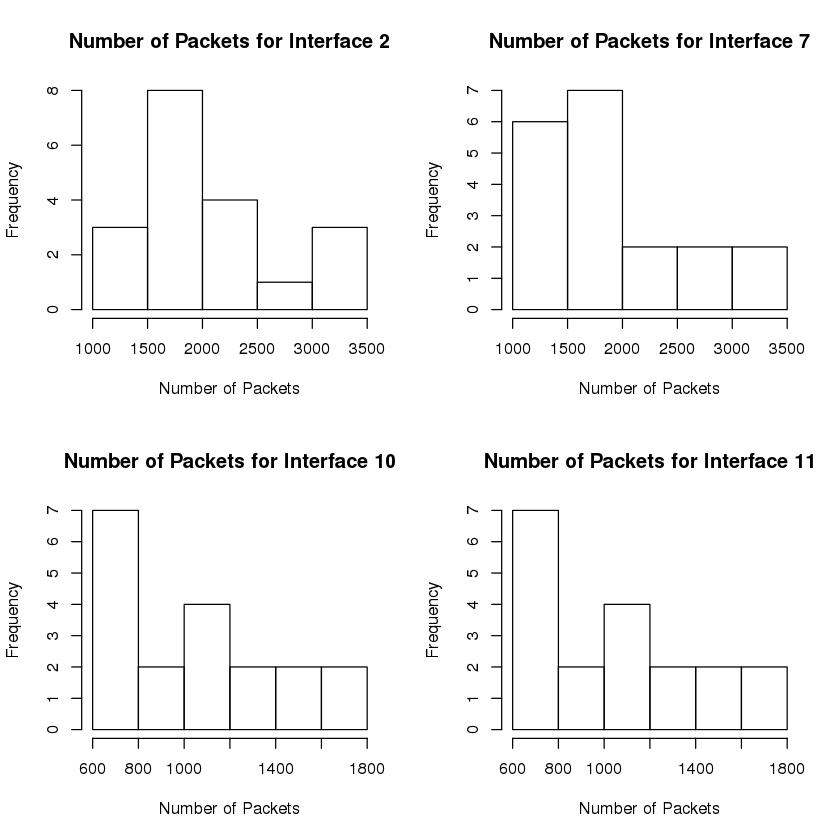

In [9]:
inter_2 <- snmpData[snmpData$if. == 2, ]
inter_7 <- snmpData[snmpData$if. == 7, ]
inter_10 <- snmpData[snmpData$if. == 10, ]
inter_11 <- snmpData[snmpData$if. == 11, ]

all_cols2 = function(col_name, interf){
    asdf <- eval(parse(text = paste('inter',"_",interf,"$",col_name, sep="")))
    #print(paste('inter',"_",interf,"$",col_name, sep=""))
    #print(eval(parse(text = paste('inter',"_",interf,"$",col_name, sep=""))))
    return (asdf)
}

#inter$outUCastPkts,inter$inUcastPkts,inter$outNUCastPkts,inter$inNUcastPkts, inter$inOctets,inter$outOctets
cols = c('outUCastPkts','inUcastPkts','outNUCastPkts','inNUcastPkts')

par(mfrow=c(2,2))

Result <- list()


AddItemNaive2 <- function(item)
{
    .GlobalEnv$Result <- c(.GlobalEnv$Result, item)
}

for (i in c('2','7','10','11')){
    result <- sapply(cols, all_cols2, interf=i)
    #print(result)
    summ = data.frame(rowSums(result))
    AddItemNaive2(summ)
    
    hist(rowSums(result),main=paste('Number of Packets for Interface ', i, sep=""),xlab="Number of Packets")
    #print(summ)
}

#print(Result[1])



### Problem #5
Is the behavior across any of interfaces 2, 7, 10 and 11 correlated? In other words, are the number of packets sent on one link similar to the number of packets sent on another link? A similar property might be seen for the number of bytes. Use the "correlation" function (corr) across interfaces 2, 7, 10 and 11 for packets (as above) to argue what links have the most correlated behavior.

In [10]:
cor(as.numeric(unlist(Result[1])), as.numeric(unlist(Result[4])))
cor(as.numeric(unlist(Result[2])), as.numeric(unlist(Result[4])))
cor(as.numeric(unlist(Result[3])), as.numeric(unlist(Result[4])))
cor(as.numeric(unlist(Result[1])), as.numeric(unlist(Result[3])))
cor(as.numeric(unlist(Result[2])), as.numeric(unlist(Result[3])))
cor(as.numeric(unlist(Result[1])), as.numeric(unlist(Result[2])))

print('According to the cor function, interfaces 10 and 11 are the highest correlated because the correlation is closest to 1.')
print('This is closely followed by interfaces 2 and 7')

[1] 0.390501

[1] 0.3962536

[1] 0.9998886

[1] 0.3907492

[1] 0.3964814

[1] 0.9991045

[1] "According to the cor function, interfaces 10 and 11 are the highest correlated because the correlation is closest to 1."
[1] "This is closely followed by interfaces 2 and 7"


### Problem #6
Using the equations from Baudec (section 2.2.3), compute the confidence interval for the mean for the number of inUcastPkts packets  per interval on interface #2. You can use the built in commands in R to compute the mean and variance (or sd). Compute the 90 and 95% confidence intervals "by hand" (i.e. follow the equations in the text and don't use the built-in tests).

In [11]:
inter <- snmpData[snmpData$if. == 2, ]
ucast <- inter$inUcastPkts



conf_interval = function(vect, conf){
    mm = mean(vect)
    vv = var(vect)
    ss = sd(vect)
    len = length(vect)

    zz = (1+conf)/2    
    qq = qnorm(zz)
    
    interval = qq*ss/(len^(1/2))
    
    return(interval)
}

ci90 <- conf_interval(ucast, 0.9)
sprintf("90 confidence interval => %f to %f", (mean(ucast)-ci90), (mean(ucast)+ci90))


ci95 <- conf_interval(ucast, 0.95)
sprintf("95 confidence interval => %f to %f", (mean(ucast)-ci95), (mean(ucast)+ci95))



[1] "90 confidence interval => 1404.541582 to 1698.616313"

[1] "95 confidence interval => 1376.373120 to 1726.784775"

### Problem #7
Using paired confidence intervals (you can use the t.test function -- see SimpleR, page 69) to argue whether links 3 and 6 have a statistically identical number of total packets (input + output, all types) per sampling period at the 90, 95 and 99% confidence level. Show the calculations and justify your answer.

In [26]:
inter_3 <- snmpData[snmpData$if. == 3, ]
inter_6 <- snmpData[snmpData$if. == 6, ]

cols = c('outUCastPkts','inUcastPkts','outNUCastPkts','inNUcastPkts')

all_cols2 = function(col_name, interf){
    asdf <- eval(parse(text = paste('inter',"_",interf,"$",col_name, sep="")))
    #print(paste('inter',"_",interf,"$",col_name, sep=""))
    #print(eval(parse(text = paste('inter',"_",interf,"$",col_name, sep=""))))
    return (asdf)
}

# t.test(x, y = NULL, alternative = c("two.sided", "less", "greater"), mu = 0, paired =
# FALSE, var.equal = FALSE, conf.level = 0.95)

for (i in c(.90,.95,.99)){
    
    result3 <- sapply(cols, all_cols2, interf='3')
    result6 <- sapply(cols, all_cols2, interf='6')
    #print(result)
    summ3 = data.frame(rowSums(result3))
    summ6 = data.frame(rowSums(result6))
    #print(summ6)
    #print(colSums(summ))
    print(t.test(summ3$rowSums.result3.,summ6$rowSums.result6.,paired=TRUE,conf.level=i))
}

print('They are not statistically identical because the t-test confidence interval is not zero, or even near zero.')
print('In order for links 3 and 6 to be statistically identical, the t-test confidence interval and')
print('difference between the means should be near zero.')


	Paired t-test

data:  summ3$rowSums.result3. and summ6$rowSums.result6.
t = 67.252, df = 18, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 90.60205 95.39795
sample estimates:
mean of the differences 
                     93 


	Paired t-test

data:  summ3$rowSums.result3. and summ6$rowSums.result6.
t = 67.252, df = 18, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 90.09473 95.90527
sample estimates:
mean of the differences 
                     93 


	Paired t-test

data:  summ3$rowSums.result3. and summ6$rowSums.result6.
t = 67.252, df = 18, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 89.01954 96.98046
sample estimates:
mean of the differences 
                     93 

[1] "They are not statistically identical because the t-test confidence interval is not zero, or eve

### Problem #8

Use the R "bootstrap" method (see Boudec Algorithm 2.1 and http://www.statmethods.net/advstats/bootstrapping.html ) to compute the confidence interval for the MEDIAN number of total packets (input + output, all types) per sampling period for link 3 at the 90 and 95 level. 

In [50]:
library(boot)

rsq <- function(data, indices) {
  d <- data[indices] # allows boot to select sample 
  return(median(d))
} 

#R=ceiling(50/(1-conf)-1)
#print(summ3$rowSums.result3.)

# get 90% confidence interval 
gamma=ceiling(50/(1-.90)-1)
bobj <- boot(summ3$rowSums.result3.,rsq,R=gamma)
boot.ci(bobj, type="perc", conf=.9)


# get 95% confidence interval
gamma=ceiling(50/(1-.95)-1)
bobj <- boot(summ3$rowSums.result3.,rsq,R=gamma)
boot.ci(bobj, type="perc")

 [1]  962 1128 1130  978  899  736  832  797  871  931  834  794  791  889  926
[16]  870  945  900  814


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = bobj, conf = 0.9, type = "perc")

Intervals : 
Level     Percentile     
90%   (832, 926 )  
Calculations and Intervals on Original Scale

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 999 bootstrap replicates

CALL : 
boot.ci(boot.out = bobj, type = "perc")

Intervals : 
Level     Percentile     
95%   (832, 931 )  
Calculations and Intervals on Original Scale

### Problem #9
Do the output packets of links 2 and 7 have a similar distribution of packets per samping period? One way to determine this is to use the correlation function. Another is to produce a qqplot showing  the relationship of one link to another. Produce such a plot and include it in your report.

[1] 0.9998318

[1] "Based on the plot and correlation of .999, they are very similarly distributed."


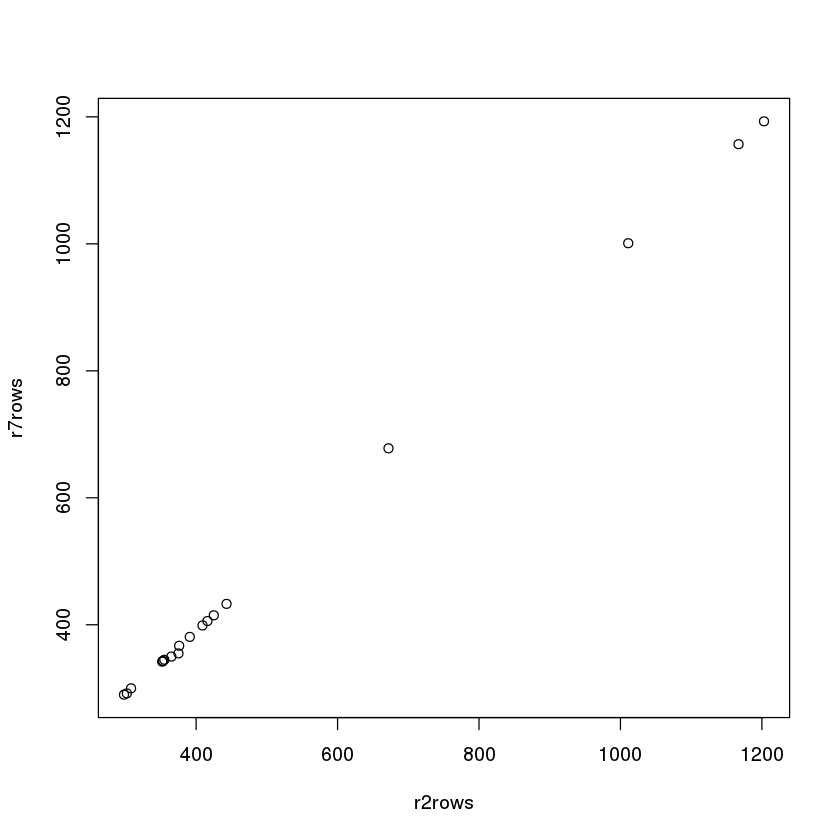

In [59]:
inter_2 <- snmpData[snmpData$if. == 2, ]
inter_7 <- snmpData[snmpData$if. == 7, ]

cols = c('outUCastPkts','outNUCastPkts')

all_cols3 = function(col_name, interf){
    asdf <- eval(parse(text = paste('inter',"_",interf,"$",col_name, sep="")))
    #print(paste('inter',"_",interf,"$",col_name, sep=""))
    #print(eval(parse(text = paste('inter',"_",interf,"$",col_name, sep=""))))
    return (asdf)
}

result2 <- sapply(cols, all_cols2, interf='2')
result7 <- sapply(cols, all_cols2, interf='7')
r2rows <- rowSums(result2)
r7rows <- rowSums(result7)

(cor(r2rows,r7rows))
qqplot(r2rows,r7rows)
print('Based on the plot and correlation of .999, they are very similarly distributed.')

### Problem #10
This question does not use the data, but you need to produce an R program. Rather than record the full vector of data when computing a mean, you can use a pair of variables --  you simply record the sum of the terms in the vector (Sx) and the number of items (n) and then report Sx/n. Rearrange the equations equation for variance ( $ \sum_i^n (x_i - \bar x)^2 $ ) to demonstrate how you can compute the variance of an arbitrary number of data samples using a small, fixed number of variables, much as I demonstrated for computing the mean. Your solution will need to record three values from the data. You should show your derivation step-by-step. You can either do this using code (i.e. define a series of MyVar() functions that simplify expression into terms that don't involve the mean) or using math (notebooks support MathJax and LaTeX).

In [ ]:
#1 var = sum_i_to_n((x_i-x_bar)^2)
# expanding eq1 yields:
#2 var = sum_i_to_n(x_i^2-2*x_i*x_bar+x_bar^2)
#3 x_bar = sum_i_to_n(x_i/n)
# substituting eq3 in for eq 2 yields:
#4 var = sum_i_to_n(x_i^2-2*x_i*sum_i_to_n(x_i/n)-(sum_i_to_n(x_i/n))^2)
#5 var = sum_i_to_n(x_i^2-2/n*x_i*sum_i_to_n(x_i)-(1/n^2)*(sum_i_to_n(x_i))^2)

myVar <- function(data){
    n <- length(data)
    result <- sum(data^2-(2/n)*data*sum(data)-(1/n^2)*(sum(data)^2))
}

